In [1]:
# 导入相关包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from matplotlib.ticker import MultipleLocator
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import ensemble
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import VotingRegressor
import shap
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import make_scorer
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVR
from sklearn.metrics import max_error

# 设置警告过滤器
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)


In [2]:
# 读取数据集
dataset = pd.read_excel('CNselected_features-250-16.xlsx')

# 划分数据集
print()
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    dataset.iloc[:, 7:27], 
    dataset.iloc[:, 5], 
    test_size=0.2,
    random_state=24, 
    shuffle=True
)
print(X_train1)
print(y_train1)
# 指定要移动的数据的索引
specific_indices = [19, 78, 152, 197]

# 初始化待添加到训练集的空 DataFrame 和 Series
X_rows_to_move = X_test1.loc[specific_indices]
y_rows_to_move = y_test1.loc[specific_indices]

# 从测试集中移除已移动的行
X_test = X_test1.drop(specific_indices)
y_test = y_test1.drop(specific_indices)

# 将提取的数据添加到训练集中
X_train = pd.concat([X_train1, X_rows_to_move], axis=0)
y_train = pd.concat([y_train1, y_rows_to_move], axis=0)

# 打印结果
print(X_train)
print(y_train)
print('训练集特征矩阵 X_train 的形状：', X_train.shape)
print('训练集标签向量 y_train 的形状：', y_train.shape)
print('测试集特征矩阵 X_test 的形状：', X_test.shape)
print('测试集标签向量 y_test 的形状：', y_test.shape)


       AATS2s    AATS4s   ATSC1pe    AATSC3m   AATSC1p  Xc-6d  NdsCH  \
181  1.874150  1.496732  0.167676  -3.952983 -0.023498    0.0      0   
231  2.962500  2.133333 -0.177995  -5.218764 -0.083052    0.0      0   
230  2.350379  1.831597 -0.062864  -3.361606 -0.036275    0.0      0   
165  2.111667  1.880577  0.129904   0.306302 -0.018342    0.0      4   
166  2.008648  1.786836  0.132910   0.336566 -0.018168    0.0      2   
..        ...       ...       ...        ...       ...    ...    ...   
145  2.172619  2.122428  0.124698   1.394457 -0.028407    0.0      0   
87   2.780000  1.000000 -0.186916 -32.514062 -0.020573    0.0      0   
192  4.322917  5.000000 -0.030745  -6.855248 -0.041240    0.0      1   
131  2.784314  2.861111  0.093049   0.398083 -0.056429    0.0      0   
162  2.068262  1.850694  0.130272   0.357110 -0.020323    0.0      2   

        SssCH2     SaaCH     SdssC      SssO  ETA_beta_ns_d  AETA_eta  \
181   7.531536  0.000000  0.000000  5.455000            0.0  

     Measured_CN    AATS2s    AATS4s   ATSC1pe    AATSC3m   AATSC1p  Xc-6d  \
0           20.6  1.541667  1.333333 -0.062500  -1.006596 -0.039499    0.0   
1           30.0  1.541667  1.370370 -0.061038  -0.605097 -0.031342    0.0   
2           44.8  1.541667  1.361111 -0.060025  -0.403553 -0.025955    0.0   
3           56.0  1.541667  1.361111 -0.059282  -0.288192 -0.022138    0.0   
4           63.8  1.541667  1.361111 -0.058713  -0.216047 -0.019295    0.0   
..           ...       ...       ...       ...        ...       ...    ...   
244         15.0  4.792735  7.996212 -0.081575 -16.908386 -0.101971    0.0   
245         21.0  3.594697  4.597222  0.089082  -0.553512 -0.064940    0.0   
246         19.0  4.383041  5.212121 -0.004450   4.356663 -0.040700    0.0   
247         23.0  3.193548  3.101010  0.160958   4.607539 -0.044640    0.0   
248         48.0  2.534483  1.879630 -0.192929  -0.763753 -0.005957    0.0   

     Xc-6dv  NdsCH    SssCH2     SaaCH     SdssC      SssO  ETA

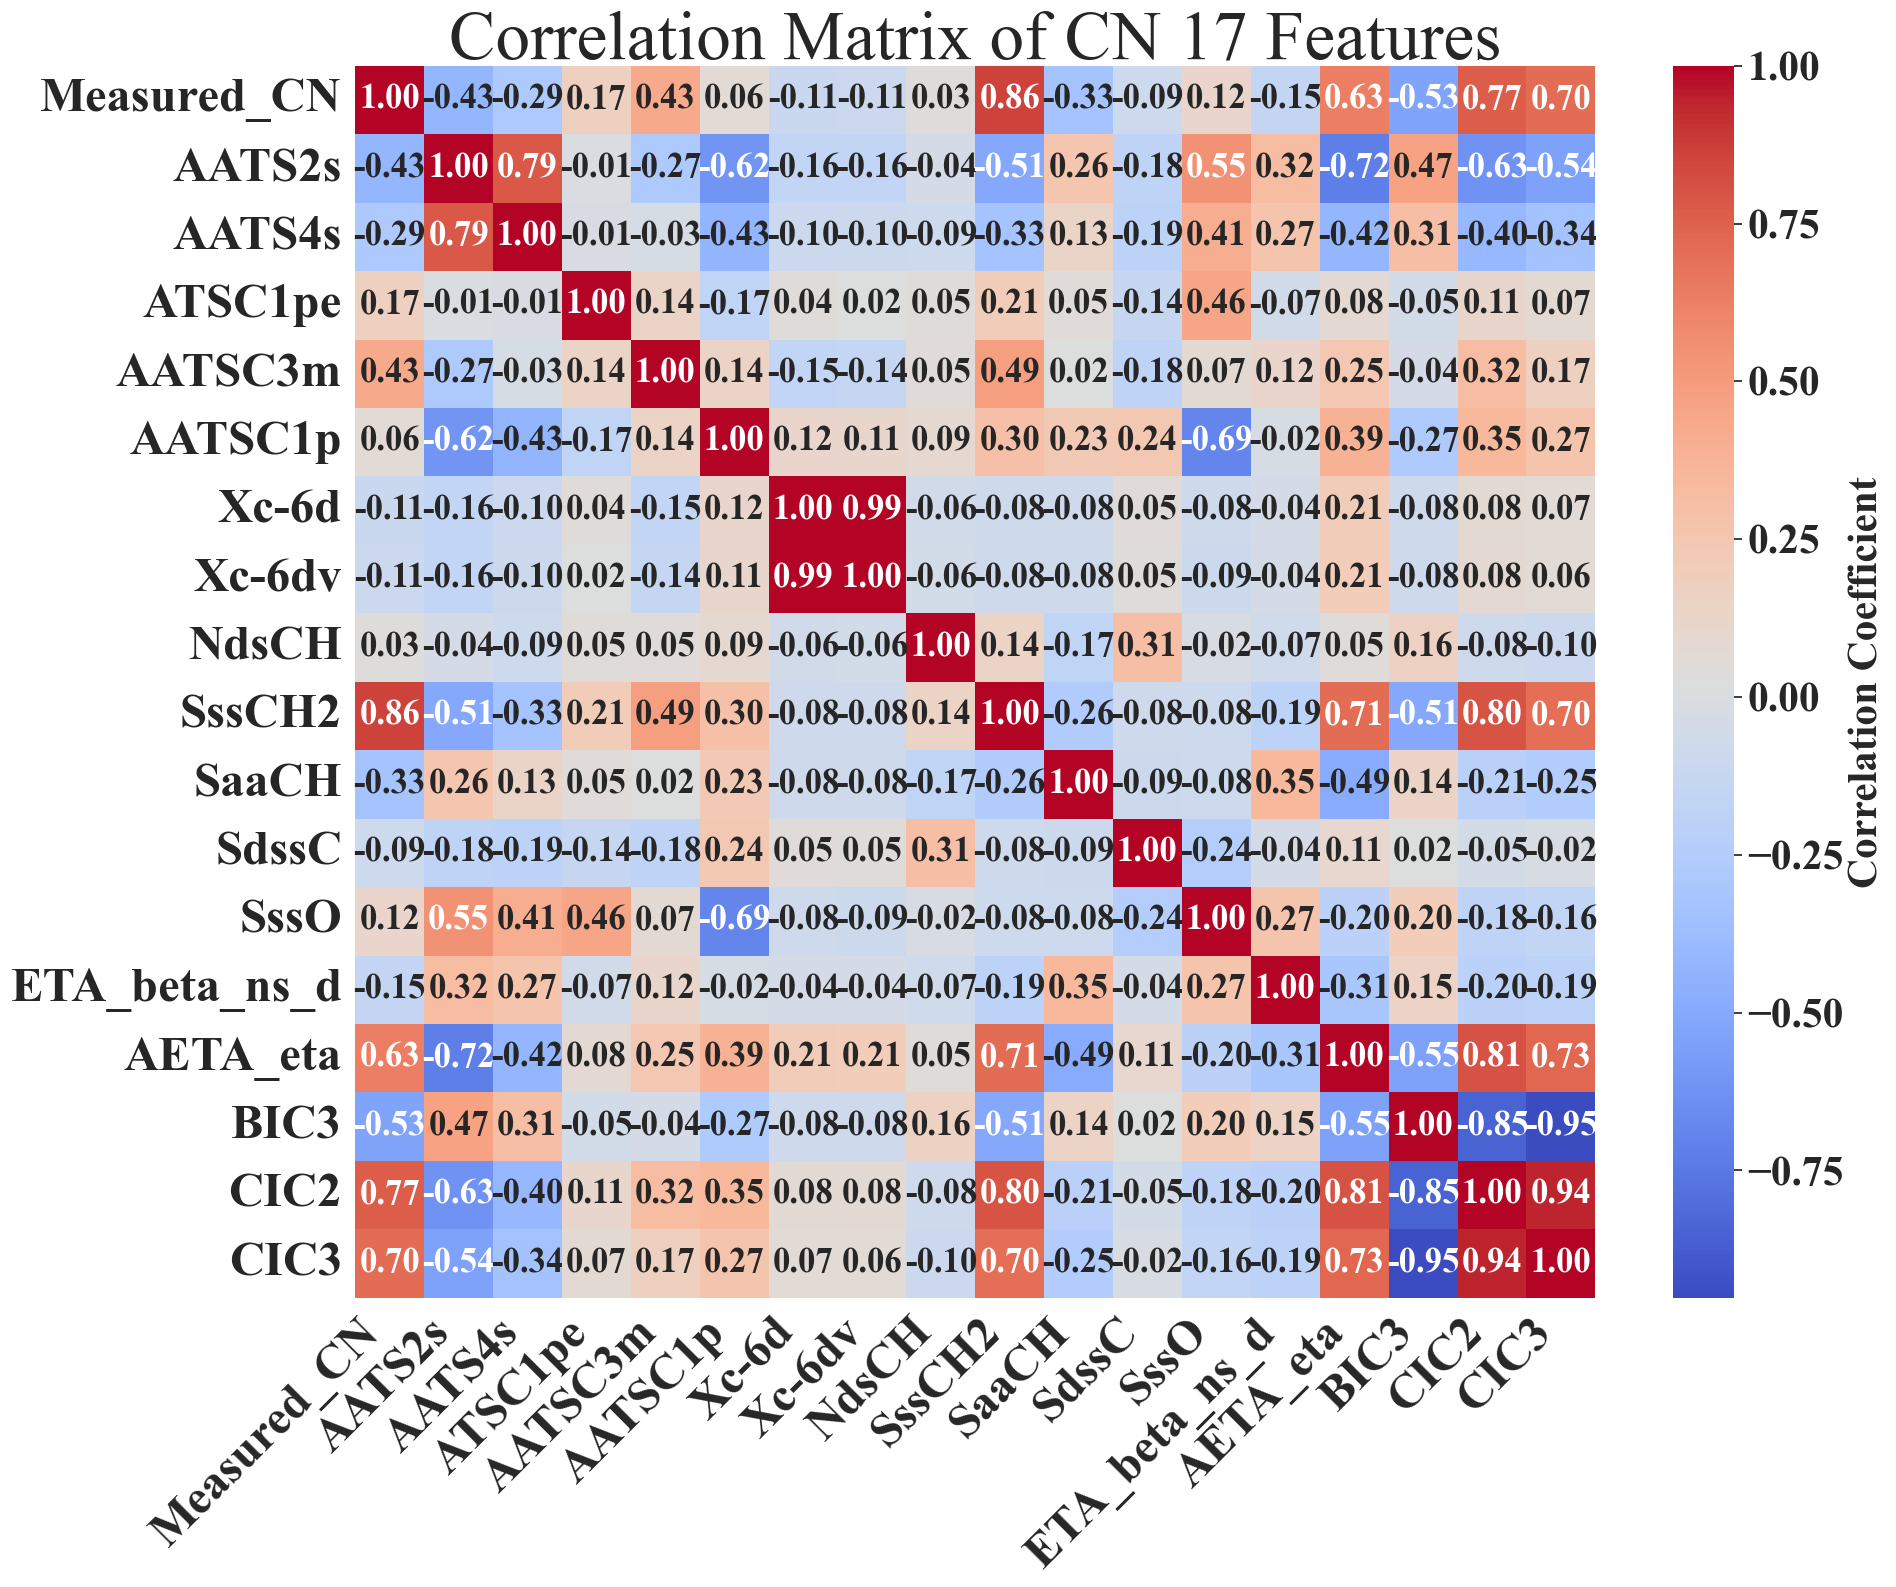

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel数据
dataset=pd.read_excel('CNselected_features-250-17.xlsx')
excel_data = pd.read_excel('CNselected_features-250-17.xlsx', nrows=1)
train = dataset.iloc[:,5:23]
print(train)
# 设置字体放大
sns.set(font_scale=1.0)  # 这里是整体的字体缩放，可以进一步调整

# 设置字体为罗马字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

# 选择特定的列作为数值特征
numerical_features = excel_data.columns.tolist()[5:23]

# 假设 `train` 是你的训练数据，在此之前你需要加载该数据集，例如：
# train = pd.read_excel('train_data.xlsx') 或者用
# train = pd.read_csv('train_data.csv')
# 这里假设 train 是一个已经存在的 DataFrame
correlation_matrix = train[numerical_features].corr()

# 绘制相关矩阵热图
plt.figure(figsize=(20,16))

# 创建热图时设置注释的字体大小
ax = sns.heatmap(correlation_matrix, 
                 annot=True, 
                 cmap='coolwarm', 
                 fmt=".2f", 
                 annot_kws={"size": 25, "fontweight": 'bold'},  # 设置注释字体大小和加粗
                 cbar_kws={'label': 'Correlation Coefficient'})

# 设置颜色条（cbar）的字体样式
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)  # 设置颜色条刻度标签字体大小
cbar.set_label('Correlation Coefficient', fontsize=30, weight='bold', fontname='Times New Roman')  # 设置颜色条标签字体

# 设置标题
plt.title('Correlation Matrix of CN 17 Features', fontsize=50, fontname='Times New Roman')

# 设置轴标签的字体大小
ax.set_xticklabels(ax.get_xticklabels(), fontsize=35, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=35, rotation=0)

# 显示热图
plt.show()

          Feature  Importance
8          SssCH2    0.607590
11           SssO    0.095457
16           CIC3    0.085366
15           CIC2    0.083408
4         AATSC1p    0.029064
14           BIC3    0.027026
13       AETA_eta    0.018966
0          AATS2s    0.016548
3         AATSC3m    0.012156
9           SaaCH    0.009352
1          AATS4s    0.006027
2         ATSC1pe    0.004621
7           NdsCH    0.002042
10          SdssC    0.001868
12  ETA_beta_ns_d    0.000210
5           Xc-6d    0.000196
6          Xc-6dv    0.000103


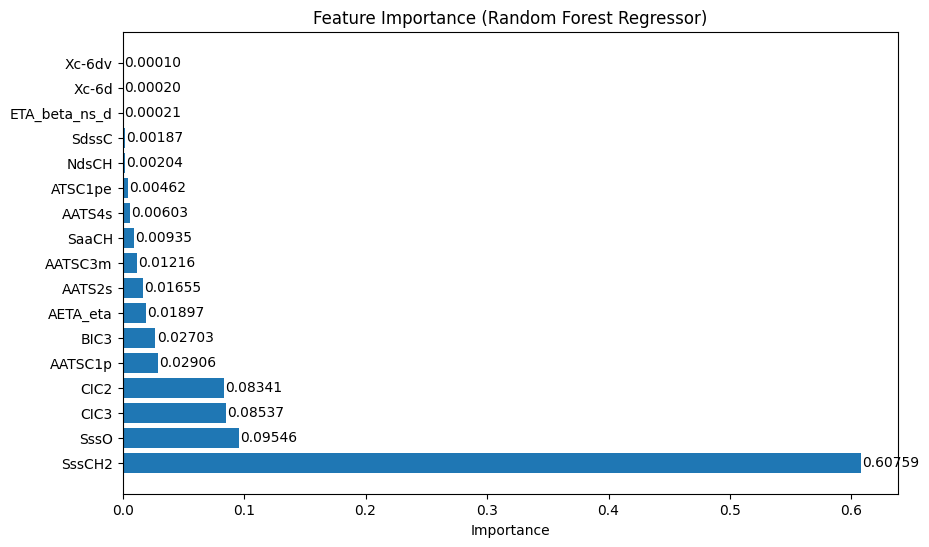

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 读取数据
dataset = pd.read_excel('CNselected_features-250-17.xlsx')
X = dataset.iloc[:, 6:23]
y = dataset.iloc[:, 5]

# 初始化随机森林回归器
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X, y)

# 获取特征重要性
feature_importances = rf.feature_importances_

# 将特征重要性与特征名对应起来
excel_data = pd.read_excel('CNselected_features-250-17.xlsx', nrows=1)
features = excel_data.columns.tolist()[6:23]
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 按重要性降序排序
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 打印特征重要性
print(importance_df)

# 可视化特征重要性
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'])

# 在柱状图右侧添加数字
for bar in bars:
    width = bar.get_width()  # 获取每个柱子的宽度（即重要性值）
    plt.text(width + 0.001, bar.get_y() + bar.get_height() / 2,  # 添加文本
             f'{width:.5f}',  # 格式化数字到4位小数
             va='center', ha='left', fontsize=10)

# 添加标签和标题
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest Regressor)')
plt.show()


In [97]:

# Model Selection and Training

# Initialize the models as one model
models =[("GradientBoostingRegressor", ensemble.GradientBoostingRegressor(random_state=0)),
    ("xgboost", XGBRegressor(random_state=0, n_jobs=-1)),
    ("LinearRegression", LinearRegression()),
    ("RandomForestRegressor", RandomForestRegressor()),
    ( "PLSR" , PLSRegression(n_components=10))]

Model: GradientBoostingRegressor
r2: 89.88%
Standard Deviation: 7.77%
Model: xgboost
r2: 90.42%
Standard Deviation: 7.15%
Model: LinearRegression
r2: 81.96%
Standard Deviation: 6.03%
Model: RandomForestRegressor
r2: 88.74%
Standard Deviation: 6.64%
Model: PLSR
r2: 81.35%
Standard Deviation: 6.31%


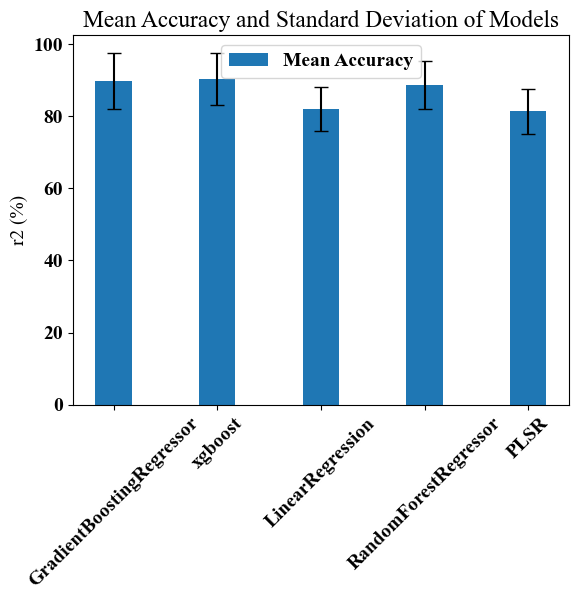

In [98]:
# Initialize lists to store mean accuracies and standard deviations
mean_accuracies = []
std_deviations = []

# Train each model using k-fold cross-validation and store results
for model_name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2',error_score='raise')
    mean_accuracy = cv_results.mean() * 100
    std_deviation = cv_results.std() * 100
    mean_accuracies.append(mean_accuracy)
    std_deviations.append(std_deviation)
    print(f"Model: {model_name}")
    print(f"r2: {mean_accuracy:.2f}%")
    print(f"Standard Deviation: {std_deviation:.2f}%")
    print("=" * 40)

# Plot mean accuracies with error bars
x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, mean_accuracies, width, label='Mean Accuracy', yerr=std_deviations, capsize=5)
ax.set_ylabel('r2 (%)')
ax.set_title('Mean Accuracy and Standard Deviation of Models')
ax.set_xticks(x)
ax.set_xticklabels([model_name for model_name, _ in models])
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [3]:
best_xgboost = XGBRegressor(max_depth=3, n_estimators=872, random_state=42,learning_rate= 0.15386752275823648,min_child_weight=2)
best_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(learning_rate=0.15, max_depth=3, n_estimators=200,  min_samples_split=6,random_state=42)
best_LinearRegression = LinearRegression()
best_RandomForestRegressor = RandomForestRegressor(max_depth= 7, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=250,random_state=42)
best_svr = SVR(kernel='rbf', C=1000, gamma=0.01, epsilon=2)

best_xgboost.fit(X_train, y_train)
best_GradientBoostingRegressor.fit(X_train, y_train)
best_LinearRegression.fit(X_train, y_train)
best_RandomForestRegressor.fit(X_train, y_train)
best_svr.fit(X_train, y_train)
#best_PLSR.fit(X_train, y_train)
# Evaluate the best models on the test set
xgboost_train_r2 = r2_score(y_train, best_xgboost.predict(X_train))
xgboost_train_rmse = np.sqrt(mean_squared_error(y_train, best_xgboost.predict(X_train)))
xgboost_test_r2 = r2_score(y_test, best_xgboost.predict(X_test))
xgboost_test_rmse = np.sqrt(mean_squared_error(y_test, best_xgboost.predict(X_test)))

GradientBoostingRegressor_train_r2 = r2_score(y_train, best_GradientBoostingRegressor.predict(X_train))
GradientBoostingRegressor_train_rmse = np.sqrt(mean_squared_error(y_train, best_GradientBoostingRegressor.predict(X_train)))
GradientBoostingRegressor_test_r2 = r2_score(y_test, best_GradientBoostingRegressor.predict(X_test))
GradientBoostingRegressor_test_rmse = np.sqrt(mean_squared_error(y_test, best_GradientBoostingRegressor.predict(X_test)))

LinearRegression_train_r2 = r2_score(y_train, best_LinearRegression.predict(X_train))
LinearRegression_train_rmse = np.sqrt(mean_squared_error(y_train, best_LinearRegression.predict(X_train)))
LinearRegression_test_r2 = r2_score(y_test, best_LinearRegression.predict(X_test))
LinearRegression_test_rmse = np.sqrt(mean_squared_error(y_test, best_LinearRegression.predict(X_test)))

RandomForestRegressor_train_r2 = r2_score(y_train, best_RandomForestRegressor.predict(X_train))
RandomForestRegressor_train_rmse = np.sqrt(mean_squared_error(y_train, best_RandomForestRegressor.predict(X_train)))
RandomForestRegressor_test_r2 = r2_score(y_test, best_RandomForestRegressor.predict(X_test))
RandomForestRegressor_test_rmse = np.sqrt(mean_squared_error(y_test, best_RandomForestRegressor.predict(X_test)))

SVR_train_r2 = r2_score(y_train, best_svr.predict(X_train))
SVR_train_rmse = np.sqrt(mean_squared_error(y_train, best_svr.predict(X_train)))
SVR_test_r2 = r2_score(y_test, best_svr.predict(X_test))
SVR_test_rmse = np.sqrt(mean_squared_error(y_test, best_svr.predict(X_test)))

print("XGBRegressor train r2:", xgboost_train_r2)
print("XGBRegressor train RMSE:", xgboost_train_rmse)
print("XGBRegressor Test r2:", xgboost_test_r2)
print("XGBRegressor Test RMSE:", xgboost_test_rmse)

print("GradientBoostingRegressor train r2:", GradientBoostingRegressor_train_r2)
print("GradientBoostingRegressor train RMSE:", GradientBoostingRegressor_train_rmse)
print("GradientBoostingRegressor Test r2:", GradientBoostingRegressor_test_r2)
print("GradientBoostingRegressor Test RMSE:", GradientBoostingRegressor_test_rmse)

print("LinearRegression train r2:", LinearRegression_train_r2)
print("LinearRegression train RMSE:", LinearRegression_train_rmse)
print("LinearRegression Test r2:", LinearRegression_test_r2)
print("LinearRegression Test RMSE:", LinearRegression_test_rmse)

print("RandomForestRegressor train r2:", RandomForestRegressor_train_r2)
print("RandomForestRegressor train RMSE:", RandomForestRegressor_train_rmse)
print("RandomForestRegressor Test r2:", RandomForestRegressor_test_r2)
print("RandomForestRegressor Test RMSE:", RandomForestRegressor_test_rmse)

print("SVR train r2:", SVR_train_r2)
print("SVR  train RMSE:", SVR_train_rmse)
print("SVR  Test r2:", SVR_test_r2)
print("SVR  Test RMSE:",SVR_test_rmse)

XGBRegressor train r2: 0.999932385362684
XGBRegressor train RMSE: 0.1959601683076759
XGBRegressor Test r2: 0.9840373931702573
XGBRegressor Test RMSE: 3.062510610477161
GradientBoostingRegressor train r2: 0.999601647696574
GradientBoostingRegressor train RMSE: 0.47564299902689755
GradientBoostingRegressor Test r2: 0.9832054368721285
GradientBoostingRegressor Test RMSE: 3.1413045923831957
LinearRegression train r2: 0.8591406545721478
LinearRegression train RMSE: 8.944174740151345
LinearRegression Test r2: 0.8507564969914363
LinearRegression Test RMSE: 9.364258863291145
RandomForestRegressor train r2: 0.9631790526587649
RandomForestRegressor train RMSE: 4.572933873727104
RandomForestRegressor Test r2: 0.879255860601154
RandomForestRegressor Test RMSE: 8.422843353994889
SVR train r2: 0.9669055923667382
SVR  train RMSE: 4.335355827818619
SVR  Test r2: 0.9371650223048152
SVR  Test RMSE: 6.07612117416438


Ensemble Test Accuracy: 0.9848
The mean squared error (MSE) on train set: 0.2930
The mean squared error (MSE) on test set: 2.9917
The R² on train set: 0.9998
The R² on test set: 0.9848
The ME on train set: 1.6271
The ME on test set: 8.5559
[ 6.33610405  3.27294308  6.13977634  5.59173831  4.44806193  6.50719563
  5.1424009   4.26494513 11.02298627  6.3497356 ]
[0.93313363 0.97604205 0.93689087 0.95818514 0.93891688 0.94055558
 0.95809421 0.94811593 0.84410336 0.86740784]
[15.63444271  7.38960557 18.3015666  14.14845487 13.09496409 21.41736544
 10.85286523 10.17931545 41.92340288 12.52872019]
Cross-validated RMSE scores: 5.907588724562489
Cross-validated r2 scores: 0.930144549369102
Cross-validated ME scores: 16.547070303947912


<Figure size 640x480 with 0 Axes>

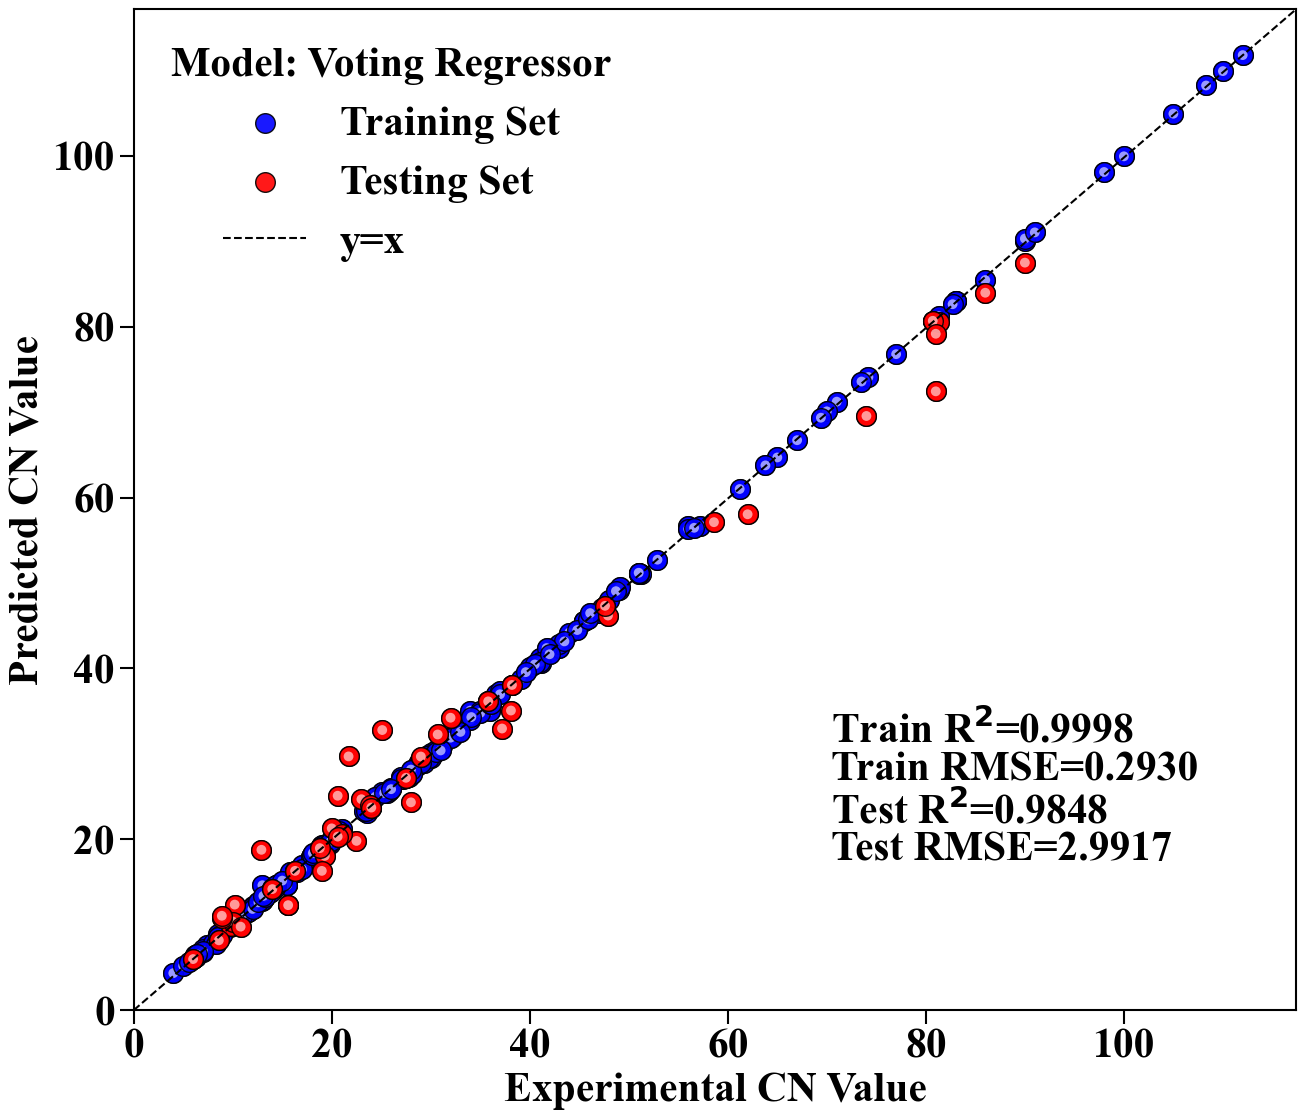

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, max_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold

# 设置字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 14

# 定义集成模型
estimators = [('xgboost', best_xgboost), 
              ('GradientBoostingRegressor', best_GradientBoostingRegressor), 
              ('LinearRegression', best_LinearRegression),
              ('RandomForestRegressor', best_RandomForestRegressor),
              ('SVR', best_svr)]
# weights = [0, 0.6, 0.0, 0.0, 0.4]  # 分配的权重和应该相加等于1
weights = [0.5, 0.5, 0.0, 0.0, 0] 
# weights = [1,0,0,0, 0]
# 创建VotingRegressor
ensemble_model = VotingRegressor(estimators=estimators, weights=weights)

# 训练集成模型
ensemble_model.fit(X_train, y_train)

# 在测试集上评估集成模型并打印准确度分数
ensemble_test_accuracy = ensemble_model.score(X_test, y_test)  # 回归问题中返回的就是R²
print(f"Ensemble Test Accuracy: {ensemble_test_accuracy:.4f}")

# 计算MSE和R²
ensemble_train_rmse = np.sqrt(mean_squared_error(y_train, ensemble_model.predict(X_train)))
ensemble_test_rmse = np.sqrt(mean_squared_error(y_test, ensemble_model.predict(X_test)))
ensemble_train_score = ensemble_model.score(X_train, y_train)
ensemble_test_score = ensemble_model.score(X_test, y_test)
ensemble_train_me = max_error(y_train, ensemble_model.predict(X_train))
ensemble_test_me = max_error(y_test, ensemble_model.predict(X_test))

print("The mean squared error (MSE) on train set: {:.4f}".format(ensemble_train_rmse))
print("The mean squared error (MSE) on test set: {:.4f}".format(ensemble_test_rmse))
print("The R² on train set: {:.4f}".format(ensemble_train_score))
print("The R² on test set: {:.4f}".format(ensemble_test_score))
print("The ME on train set: {:.4f}".format(ensemble_train_me))
print("The ME on test set: {:.4f}".format(ensemble_test_me))

# 对模型进行交叉验证并计算平均分数
rmse_scorer = make_scorer(mean_squared_error, squared=False)
r2_scorer = make_scorer(r2_score)
ME_scorer = make_scorer(max_error)
# kf = KFold(n_splits=10, shuffle=True, random_state=52)
# kf = KFold(n_splits=10, shuffle=True, random_state=3)
#投稿前的随机数
kf = KFold(n_splits=10, shuffle=True, random_state=43)

scores1 = cross_val_score(ensemble_model, X_train, y_train, cv=kf, scoring=rmse_scorer)
scores2 = cross_val_score(ensemble_model, X_train, y_train, cv=kf, scoring='r2')
scores3 = cross_val_score(ensemble_model, X_train, y_train, cv=kf, scoring=ME_scorer)

print(scores1)
print(scores2)
print(scores3)

average_score1 = np.mean(scores1)
average_score2 = np.mean(scores2)
average_score3 = np.mean(scores3)

print("Cross-validated RMSE scores:", average_score1)
print("Cross-validated r2 scores:", average_score2)
print("Cross-validated ME scores:", average_score3)

# 清除当前图形
plt.clf()
plt.figure(figsize=(15, 13))

# 设置坐标轴标签和刻度
plt.xlabel('Experimental CN Value', fontsize=30, weight='bold')
plt.ylabel('Predicted CN Value', fontsize=30, weight='bold')
plt.xticks(fontsize=30, weight='bold')
plt.yticks(fontsize=30, weight='bold')

# 绘制散点图
def plot_3d_scatter(x, y, ax, color, label, marker):
    scatter = ax.scatter(x, y, color=color, edgecolor='black', label=label, s=200, alpha=0.9, marker=marker)
    # 添加高光效果
    for i in range(len(x)):
        ax.scatter(x[i], y[i], color=color, edgecolor='black', s=200, alpha=0.9, marker=marker)
        ax.scatter(x[i], y[i], color='white', edgecolor='none', s=50, alpha=0.6, marker=marker)

# 绘制训练集和测试集的散点图
plot_3d_scatter(y_train.values, ensemble_model.predict(X_train), plt, 'blue', 'Training Set', 'o')
plot_3d_scatter(y_test.values, ensemble_model.predict(X_test), plt, 'red', 'Testing Set', 'o')

# 设置坐标轴范围
plt.xlim(left=0)
plt.ylim(bottom=0)

# 绘制y=x参考线
plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.ylim()[0], plt.ylim()[1]], color='black', linestyle='--', label='y=x')

# 在图例框中添加额外的信息
extra_info = 'Model: Voting Regressor'
plt.legend(loc='upper left', title=extra_info, prop={'size': 30, 'weight': 'bold'}, title_fontsize='30', frameon=False)

# 在图中右下角添加指定文本
plt.text(0.6, 0.28, f"Train R$^{{2}}$={ensemble_train_score:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.24, f"Train RMSE={ensemble_train_rmse:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
# plt.text(0.6, 0.24, f"Train ME={ensemble_train_me:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)

plt.text(0.6, 0.20, f"Test R$^{{2}}$={ensemble_test_score:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.16, f"Test RMSE={ensemble_test_rmse:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
# plt.text(0.6, 0.12, f"Test ME={ensemble_test_me:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)

# 加粗边框
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
plt.tick_params(width=1.5,length=10)
# 显示图形
plt.show()

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    2.2s remaining:    0.9s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    3.3s finished


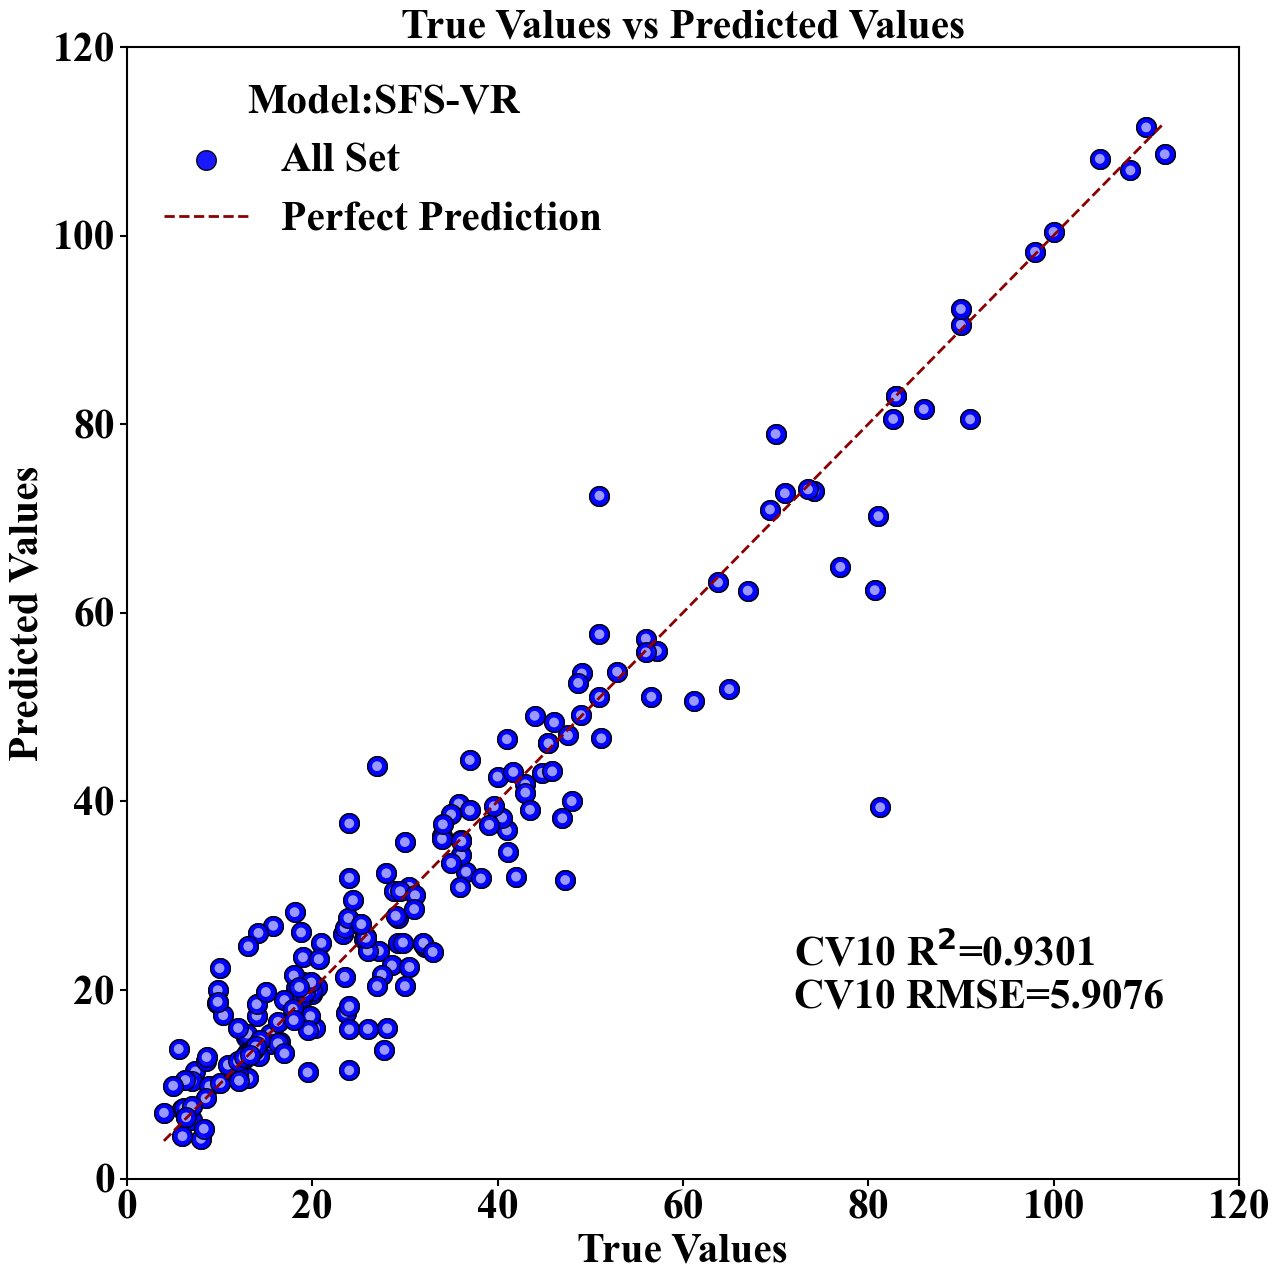

In [17]:
#训练集10折交叉验证图
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
# 创建图形
plt.figure(figsize=(13, 13))
kf = KFold(n_splits=10, shuffle=True, random_state=43)
# 设置字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 14
plt.xticks(fontsize=30, weight='bold')
plt.yticks(fontsize=30, weight='bold')
# 绘制散点图
def plot_3d_scatter(x, y, ax, color, label, marker):
    scatter = ax.scatter(x, y, color=color, edgecolor='black', label=label, s=200, alpha=0.9, marker=marker)
    # 添加高光效果
    for i in range(len(x)):
        ax.scatter(x[i], y[i], color=color, edgecolor='black', s=200, alpha=0.9, marker=marker)
        ax.scatter(x[i], y[i], color='white', edgecolor='none', s=50, alpha=0.6, marker=marker)
# 绘制散点图，使用深蓝色和朦胧白色边缘
train_cv10_predicted_values = cross_val_predict(ensemble_model, X_train, y_train, cv=kf, n_jobs=8,verbose=2)
# train_cv10_r2 = scores2
# train_cv10_rmse = scores1

plot_3d_scatter(y_train.values, train_cv10_predicted_values, plt, 'blue', 'All Set', 'o')

# 添加完美预测的参考线
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='darkred', linestyle='--', linewidth=2, label='Perfect Prediction')

# 添加标签和标题
plt.xlabel('True Values', fontsize=30, weight='bold')
plt.ylabel('Predicted Values', fontsize=30, weight='bold')
plt.title('True Values vs Predicted Values', fontsize=30, weight='bold')
plt.xlim(0, 120)
plt.ylim(0, 120)

# 添加图例
extra_info = 'Model:SFS-VR'
plt.legend(loc='upper left', title=extra_info, prop={'size': 30, 'weight': 'bold'}, title_fontsize='30', frameon=False, fancybox=True)

# 添加统计指标到图中
plt.text(0.6, 0.20, f"CV10 R$^{{2}}$={average_score2:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.16, f"CV10 RMSE={average_score1:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)

# # 添加网格线
# plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 调整布局
plt.tight_layout()

# 获取当前轴
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
plt.tick_params(width=1.5, length=5)

# 保存图像
#plt.savefig(os.path.join(save_folder, 'LFS_MLP_true_vs_predicted_combined_10_26.png'))

# 显示图像
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'ETA_beta_ns_d'),
  Text(0, 1, 'Xc-6d'),
  Text(0, 2, 'SdssC'),
  Text(0, 3, 'NdsCH'),
  Text(0, 4, 'SaaCH'),
  Text(0, 5, 'ATSC1pe'),
  Text(0, 6, 'AATS4s'),
  Text(0, 7, 'BIC3'),
  Text(0, 8, 'AETA_eta'),
  Text(0, 9, 'AATSC3m'),
  Text(0, 10, 'SssO'),
  Text(0, 11, 'AATS2s'),
  Text(0, 12, 'CIC2'),
  Text(0, 13, 'AATSC1p'),
  Text(0, 14, 'CIC3'),
  Text(0, 15, 'SssCH2')])

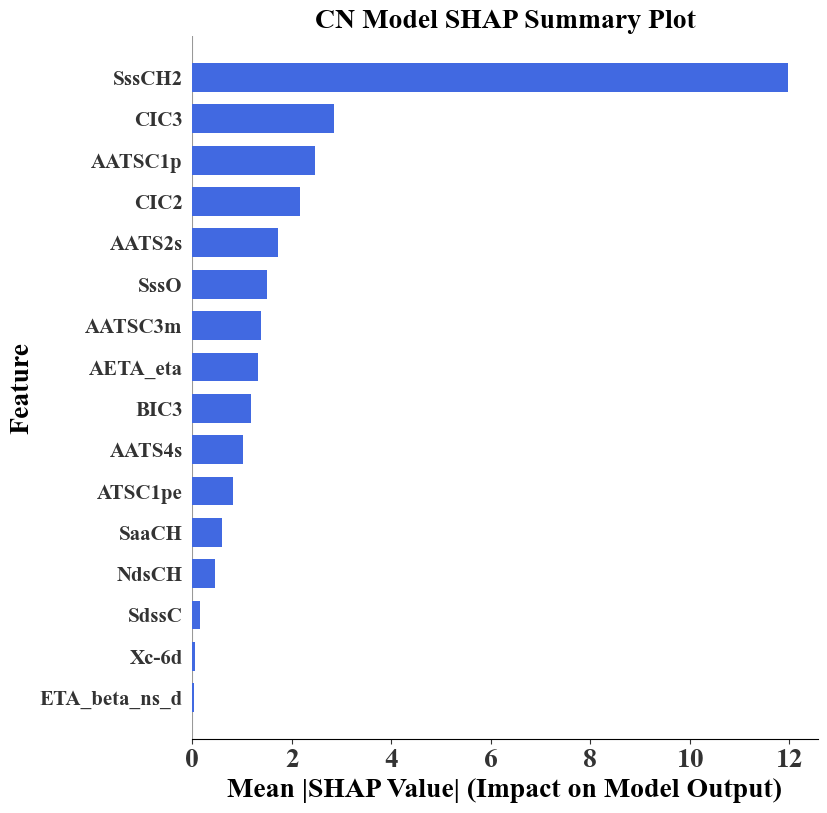

In [12]:
base_models = ensemble_model.named_estimators_
weights = np.array([0.5, 0.5, 0.0, 0.0, 0.0])

# 存储所有基模型的 SHAP 值
shap_values_dict = {}

# 计算每个基模型的 SHAP 值并加权
for (model_name, model), weight in zip(base_models.items(), weights):
    if weight == 0:
        continue
    
    # 创建 SHAP 解释器
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train)
    
    # 存储加权 SHAP 值
    shap_values_dict[model_name] = shap_values.values * weight

# 合成 SHAP 值
shap_values_combined = np.sum(list(shap_values_dict.values()), axis=0)
# shap.summary_plot(shap_values_combined, X_train)
# shap.summary_plot(shap_values, X_train, plot_type="bar", color='royalblue', show=False)

# 设置字体和样式
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

# 绘制SHAP值的摘要图
shap.summary_plot(shap_values_combined, X_train, plot_type="bar", color='royalblue', show=False)

# 获取当前图形
fig = plt.gcf()
ax = plt.gca()

# 设置图形的标题和标签
ax.set_title('CN Model SHAP Summary Plot', fontsize=20, weight='bold')
ax.set_xlabel('Mean |SHAP Value| (Impact on Model Output)', fontsize=20, weight='bold')
ax.set_ylabel('Feature', fontsize=20, weight='bold')
plt.xticks(fontsize=20, weight='bold')
plt.yticks(fontsize=15, weight='bold')

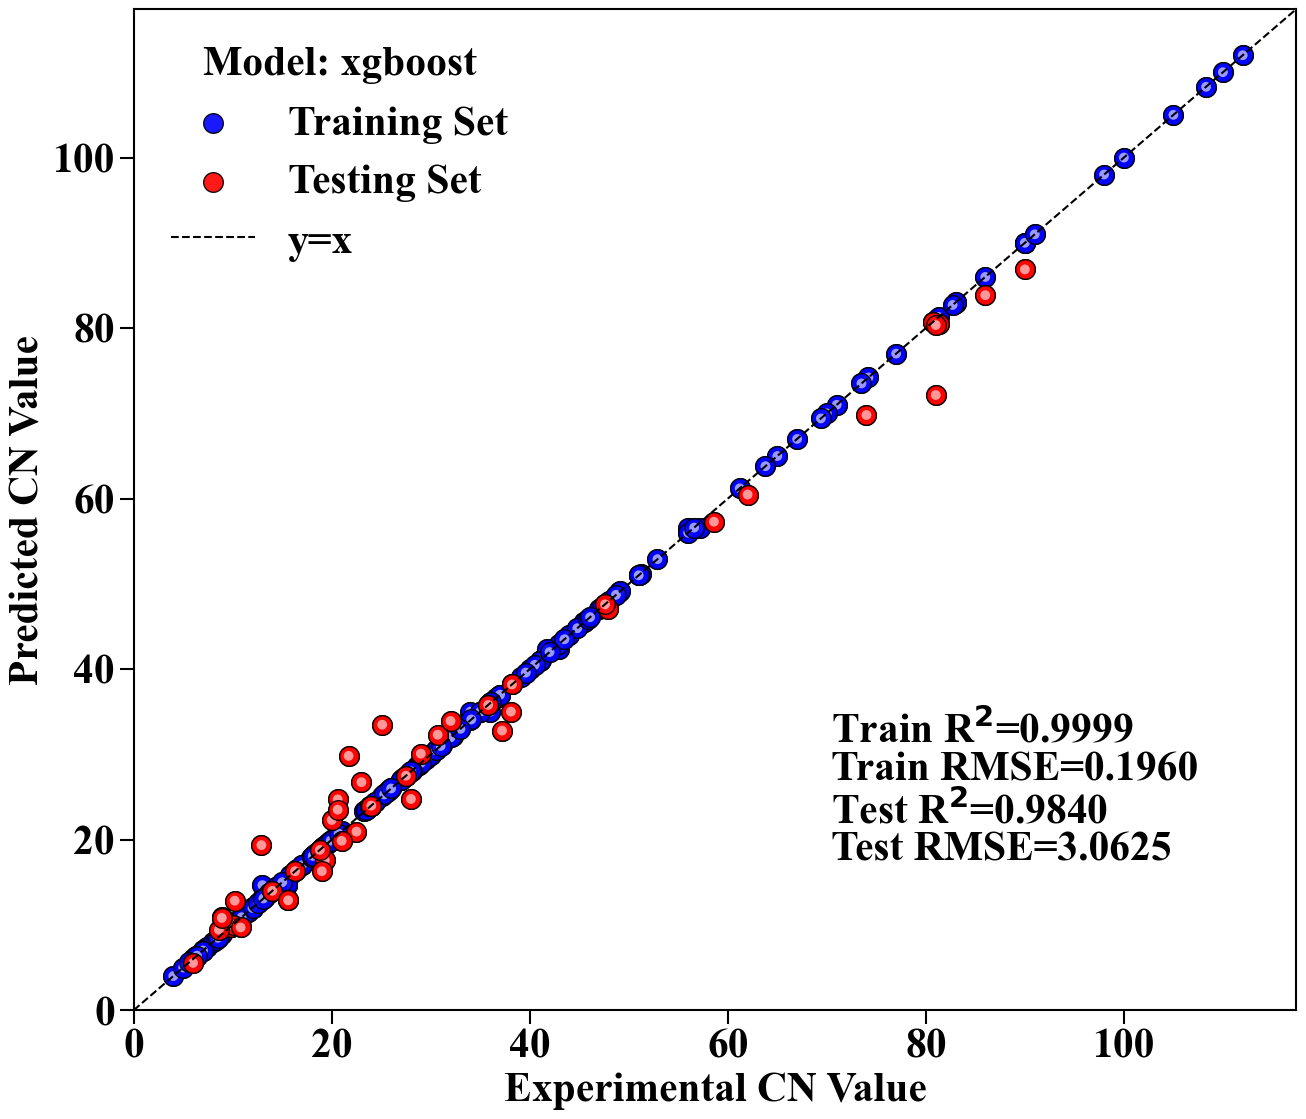

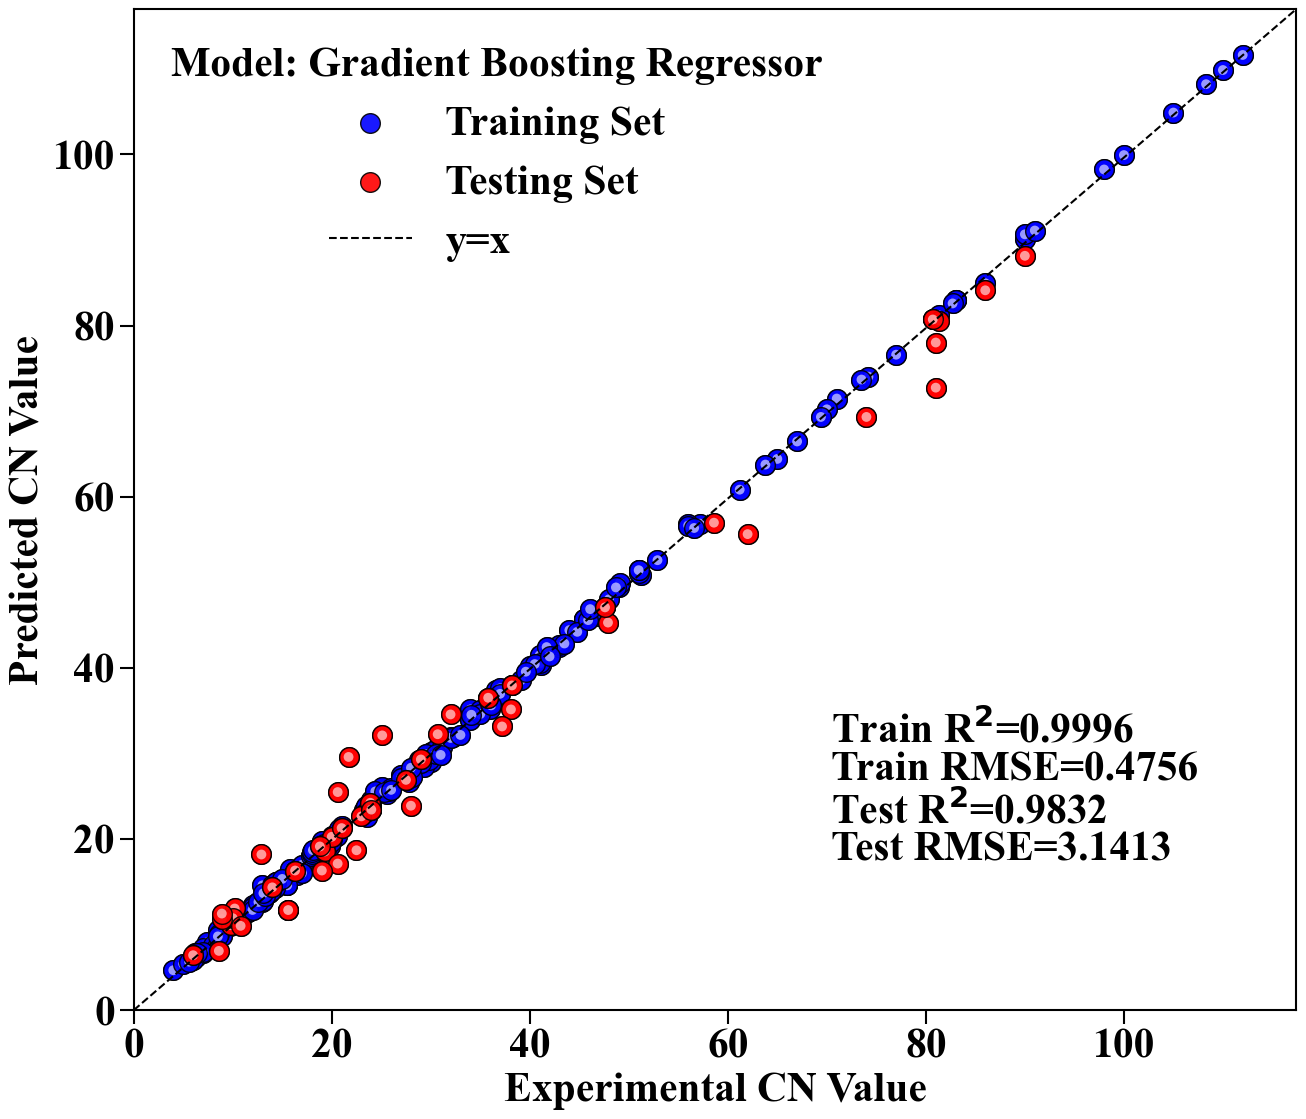

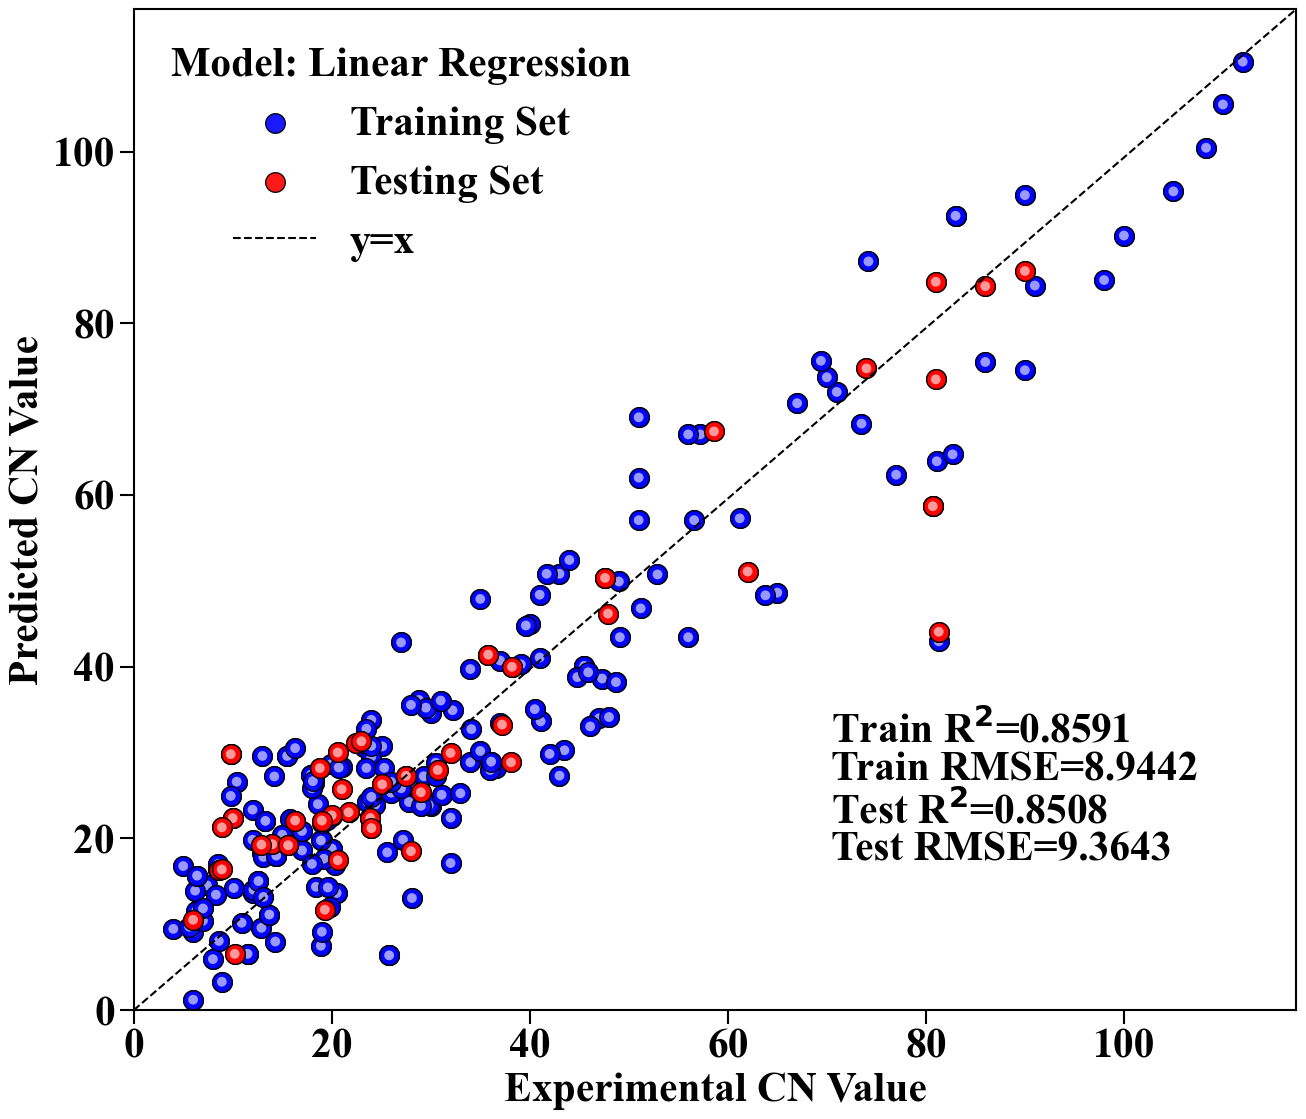

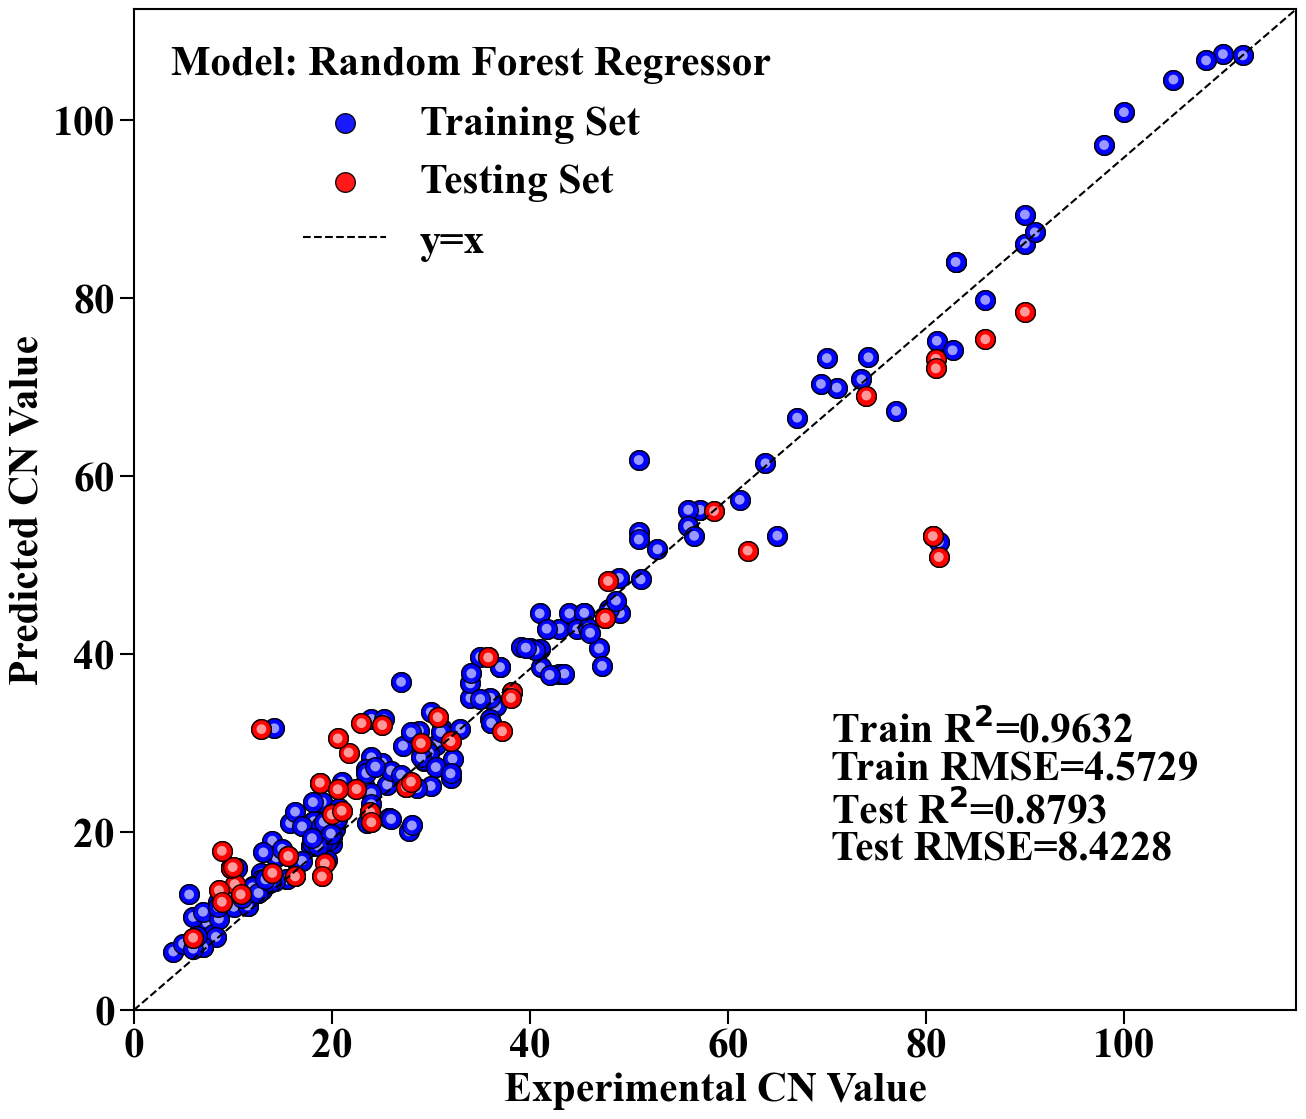

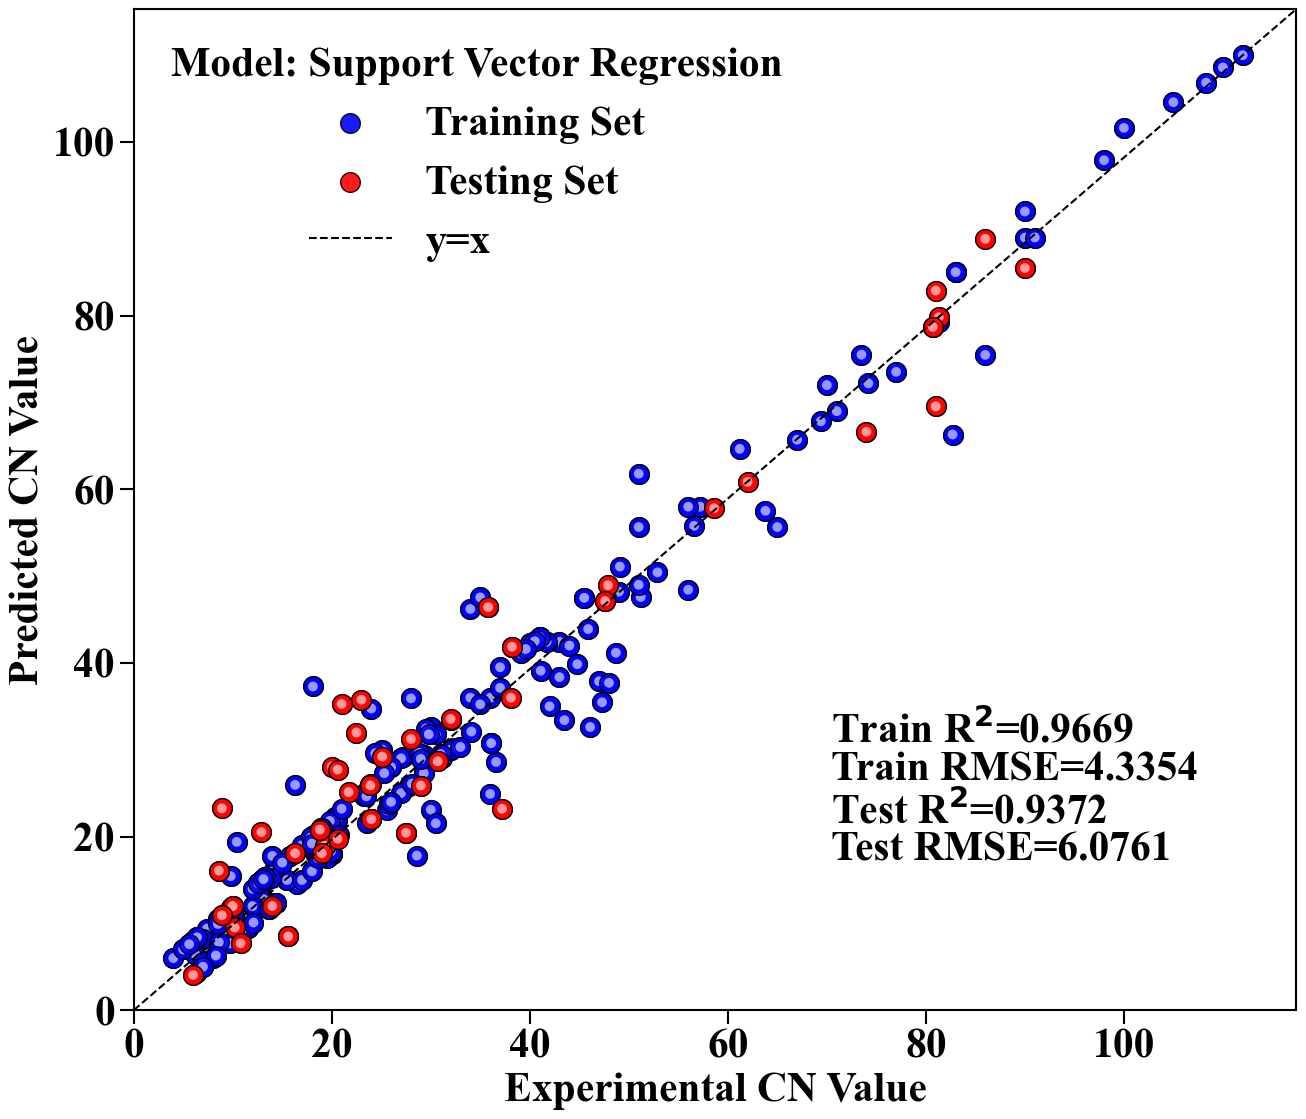

In [6]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
models = [best_xgboost, best_GradientBoostingRegressor, best_LinearRegression, best_RandomForestRegressor,best_svr]
names = ['xgboost', 'Gradient Boosting Regressor', 'Linear Regression', 'Random Forest Regressor','Support Vector Regression']
for model, name in zip(models, names):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_score = r2_score(y_train, train_pred)
    test_score = r2_score(y_test, test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_ME = max_error(y_train, train_pred)
    test_ME = max_error(y_test, test_pred)
    plt.figure(figsize=(15, 13))
    plt.clf()

    # 设置坐标轴标签
    plt.xlabel('Experimental CN Value', fontsize=30, weight='bold')
    plt.ylabel('Predicted CN Value', fontsize=30, weight='bold')
    plt.xticks(fontsize=30, weight='bold')
    plt.yticks(fontsize=30, weight='bold')

    # 绘制网格线
    #plt.grid(True, linestyle='--', alpha=1)

    # 绘制训练集和测试集的散点图，添加立体效果
    def plot_3d_scatter(x, y, ax, color, label, marker):
        # 绘制渐变色的点
        scatter = ax.scatter(x, y, color=color, edgecolor='black', label=label, s=200, alpha=0.9, marker=marker)
        # 添加高光效果
        for i in range(len(x)):
            ax.scatter(x[i], y[i], color=color, edgecolor='black', s=200, alpha=0.9, marker=marker)
            ax.scatter(x[i], y[i], color='white', edgecolor='none', s=50, alpha=0.6, marker=marker)

    ax = plt.gca()
    # 绘制训练集散点图
    plot_3d_scatter(y_train.values, train_pred, ax, 'blue', 'Training Set', 'o')
    # 绘制测试集散点图
    plot_3d_scatter(y_test.values, test_pred, ax, 'red', 'Testing Set', 'o')
    # 绘制y=x参考线
    # # 设置坐标轴范围
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.ylim()[0], plt.ylim()[1]], color='black', linestyle='--', label='y=x')

    # 在图例框中添加额外的信息
    extra_info = f'Model: {name}'
    plt.legend(loc='upper left', title=extra_info, prop={'size': 30}, title_fontsize='30', frameon=False)

    # 在图中右下角添加指定文本
    plt.text(0.6, 0.28, f"Train R$^{{2}}$={train_score:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    plt.text(0.6, 0.24, f"Train RMSE={train_rmse:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    # plt.text(0.6, 0.24, f"Train ME={train_ME:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    plt.text(0.6, 0.20, f"Test R$^{{2}}$={test_score:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    plt.text(0.6, 0.16, f"Test RMSE={test_rmse:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    # plt.text(0.6, 0.12, f"Test ME={test_ME:.4f}", fontsize=30, ha='left', weight='bold', va='center', transform=plt.gca().transAxes)
    # 加粗边框
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    plt.tick_params(width=1.5,length=10)#修改刻度线线粗细width参数，修改刻度字体labelsize参数

    # 显示图形
    plt.show()